## Implementing K-Means Clustering Algorithm from Scratch

### Bidit Sadhukhan
**B2230022**

In [49]:
# Importing the libraries
import numpy as np
import skimage.io as io
import pandas as pd
import matplotlib.pyplot as plt


In [50]:
# Importing the dataset
image_files = ['band1.gif', 'band2.gif', 'band3.gif', 'band4.gif']
images = [io.imread(file) for file in image_files]
image_band1, image_band2, image_band3, image_band4 = images


In [101]:
# Reshaping the images
data = np.hstack((image_band1.ravel().reshape((-1, 1)),
                  image_band2.ravel().reshape((-1, 1)),
                  image_band3.ravel().reshape((-1, 1)),
                  image_band4.ravel().reshape((-1, 1))))
data
print(data.shape)

(262144, 4)


In [102]:
# Implementing K-Means from scratch
def k_means_clustering(data,k):
    """
    K-Means Clustering Algorithm implementation

    Arguments:
    data -- the dataset to be clustered
    k -- the number of clusters to create

    Returns:
    None
    """
    n = data.shape[0]
    
    # Initializing Centers
    centres = data[np.random.choice(n,k, replace=False)]
    centres = np.array(centres, dtype=np.float64)
    
    closest = np.zeros(n, dtype=int)
    
    while True:
        old_closest = closest.copy()
        
        # Compute pairwise distances between data points and centers using broadcasting
        distances = np.linalg.norm(data[:, np.newaxis, :] - centres, axis=-1)
        
        closest = np.argmin(distances, axis=1)
        
        # Updating the centers
        for i in range(k):
            centres[i, :] = np.mean(data[closest == i, :], axis=0)
        
        # Check of convergence
        if np.all(closest == old_closest):
            break
            
    # Compute the intra-class variance
    intra_class_var = 0.0
    for i in range(k):
        data_in_cluster = data[closest == i, :]
        centroid = centres[i, :]
        intra_class_var += np.sum(np.linalg.norm(data_in_cluster - centroid, axis=1)**2)
    
    # Compute the inter-class variance
    inter_class_var = 0.0
    centroid_mean = np.mean(centres, axis=0)
    for i in range(k):
        centroid = centres[i, :]
        inter_class_var += np.sum(np.linalg.norm(centroid - centroid_mean)**2)
    
    print(f"Intra-class variance: {intra_class_var}")
    print(f"Inter-class variance: {inter_class_var}")
    
    plt.matshow(closest.reshape((512, 512)), cmap='gray')
    plt.title(f"K-Means Clustering Algorithm for\nK = {k}")


## K = 2

Intra-class variance: 11432316.044794828
Inter-class variance: 49.603557622821555


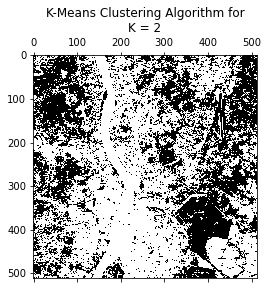

In [103]:
k_means_clustering(data, 2)

## K = 3

Intra-class variance: 8979560.490011364
Inter-class variance: 102.19657631374264


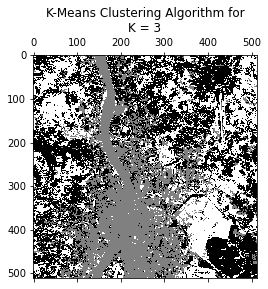

In [104]:
k_means_clustering(data, 3)

## K = 4

Intra-class variance: 7097227.29121743
Inter-class variance: 196.01643252853088


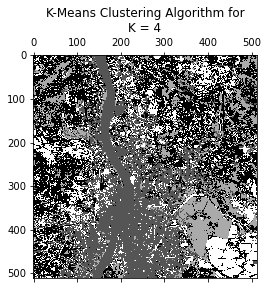

In [105]:
k_means_clustering(data, 4)

## K = 5

Intra-class variance: 5848532.865106841
Inter-class variance: 346.8368928772983


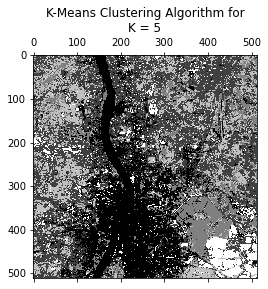

In [106]:
k_means_clustering(data, 5)

## K = 6

Intra-class variance: 5067917.285490759
Inter-class variance: 477.157236523134


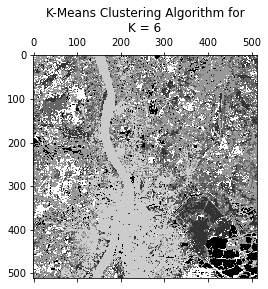

In [107]:
k_means_clustering(data, 6)

##  K = 7

Intra-class variance: 4574759.896964121
Inter-class variance: 565.4867578834507


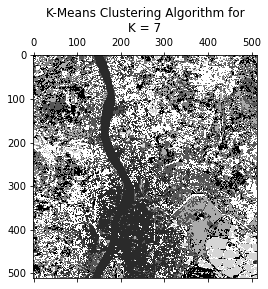

In [108]:
k_means_clustering(data, 7)

## K = 8

Intra-class variance: 3836094.297220492
Inter-class variance: 833.7439489791068


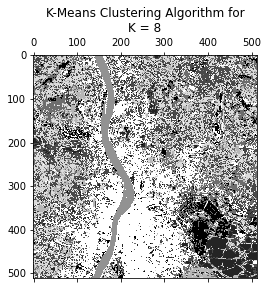

In [109]:
k_means_clustering(data, 8)